<a href="https://colab.research.google.com/github/urvakanani/Fashion_Retail_Sales_Analysis/blob/main/Fashion_Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("Fashion_Retail_Sales.csv")

# Display the first few rows and basic information
print(df.head())
print(df.info())


   Customer Reference ID Item Purchased  Purchase Amount (USD) Date Purchase  \
0                   4018        Handbag                 4619.0    2023-02-05   
1                   4115          Tunic                 2456.0    2023-07-11   
2                   4019       Tank Top                 2102.0    2023-03-23   
3                   4097       Leggings                 3126.0    2023-03-15   
4                   3997         Wallet                 3003.0    2022-11-27   

   Review Rating Payment Method  
0            NaN    Credit Card  
1            2.0    Credit Card  
2            4.1           Cash  
3            3.2           Cash  
4            4.7           Cash  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Reference ID  3400 non-null   int64  
 1   Item Purchased         3400 non-null   object 
 

In [16]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Fill missing 'Review Rating' with the mean
df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)

# Fill missing 'Purchase Amount (USD)' with the median
df['Purchase Amount (USD)'].fillna(df['Purchase Amount (USD)'].median(), inplace=True)

# Drop rows where critical columns like 'Item Purchased' or 'Payment Method' are missing
df.dropna(subset=['Item Purchased', 'Payment Method'], inplace=True)

# Verify again if there are any missing values left
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values in each column:
Customer Reference ID      0
Item Purchased             0
Purchase Amount (USD)    650
Date Purchase              0
Review Rating            324
Payment Method             0
dtype: int64

Missing values after handling:
Customer Reference ID    0
Item Purchased           0
Purchase Amount (USD)    0
Date Purchase            0
Review Rating            0
Payment Method           0
dtype: int64


<ipython-input-16-647e3b599b4d>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Review Rating'].fillna(df['Review Rating'].mean(), inplace=True)
<ipython-input-16-647e3b599b4d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [17]:
# Check for duplicate rows
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify if duplicates are removed
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")


Number of duplicate rows: 0
Number of duplicate rows after removal: 0


In [18]:
# Use IQR to detect outliers in 'Purchase Amount (USD)'
Q1 = df['Purchase Amount (USD)'].quantile(0.25)
Q3 = df['Purchase Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Purchase Amount (USD)'] >= lower_bound) & (df['Purchase Amount (USD)'] <= upper_bound)]

# Verify the updated dataset shape
print(f"Dataset shape after removing outliers: {df.shape}")


Dataset shape after removing outliers: (3357, 6)


In [19]:
# Standardize 'Item Purchased' to lowercase and strip whitespace
df['Item Purchased'] = df['Item Purchased'].str.lower().str.strip()

# Standardize 'Payment Method' by replacing inconsistent entries
df['Payment Method'] = df['Payment Method'].replace({'Credit Card': 'credit_card', 'Cash': 'cash'})

# Verify unique values in categorical columns after standardization
print("\nUnique values in 'Item Purchased':")
print(df['Item Purchased'].unique())

print("\nUnique values in 'Payment Method':")
print(df['Payment Method'].unique())



Unique values in 'Item Purchased':
['backpack' 'dress' 'boots' 'camisole' 'loafers' 'bowtie' 'poncho'
 'trousers' 'blouse' 'sneakers' 'leggings' 'tunic' 'flannel shirt' 'tie'
 'cardigan' 'jeans' 'gloves' 'scarf' 'polo shirt' 'sweater' 'wallet'
 'umbrella' 'tank top' 'pajamas' 'hat' 'handbag' 't-shirt' 'jacket'
 'kimono' 'socks' 'pants' 'hoodie' 'slippers' 'sun hat' 'trench coat'
 'belt' 'overalls' 'blazer' 'coat' 'sunglasses' 'onesie' 'swimsuit' 'vest'
 'flip-flops' 'sandals' 'romper' 'shorts' 'jumpsuit' 'raincoat' 'skirt']

Unique values in 'Payment Method':
['credit_card' 'cash']


In [20]:
# Summary statistics for numerical columns
print(df.describe())


       Customer Reference ID  Purchase Amount (USD)  Review Rating
count            3357.000000            3357.000000    3357.000000
mean             4039.550194             107.030086       2.994967
std                48.114214              49.653015       1.099425
min              3957.000000              10.000000       1.000000
25%              3997.000000              70.000000       2.100000
50%              4040.000000             110.000000       2.999057
75%              4081.000000             144.000000       3.900000
max              4122.000000             200.000000       5.000000


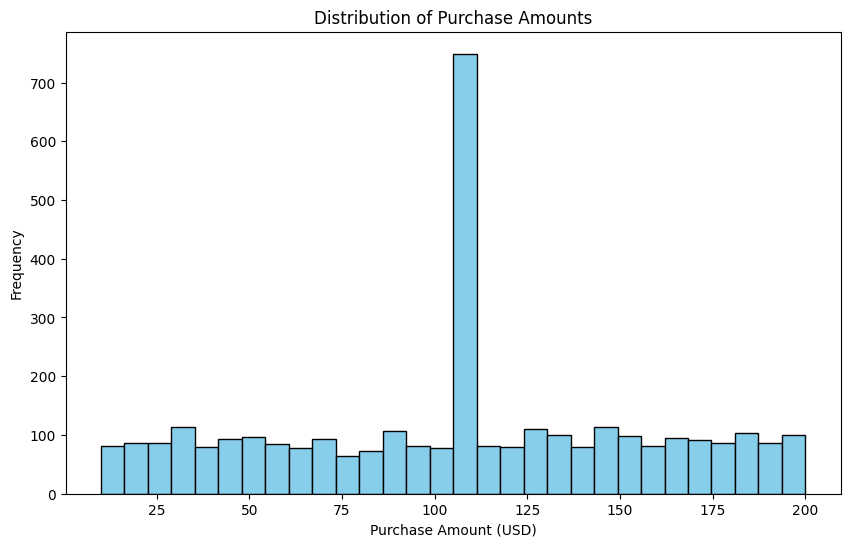

In [21]:
import matplotlib.pyplot as plt

# Histogram for Purchase Amount
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase Amount (USD)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()


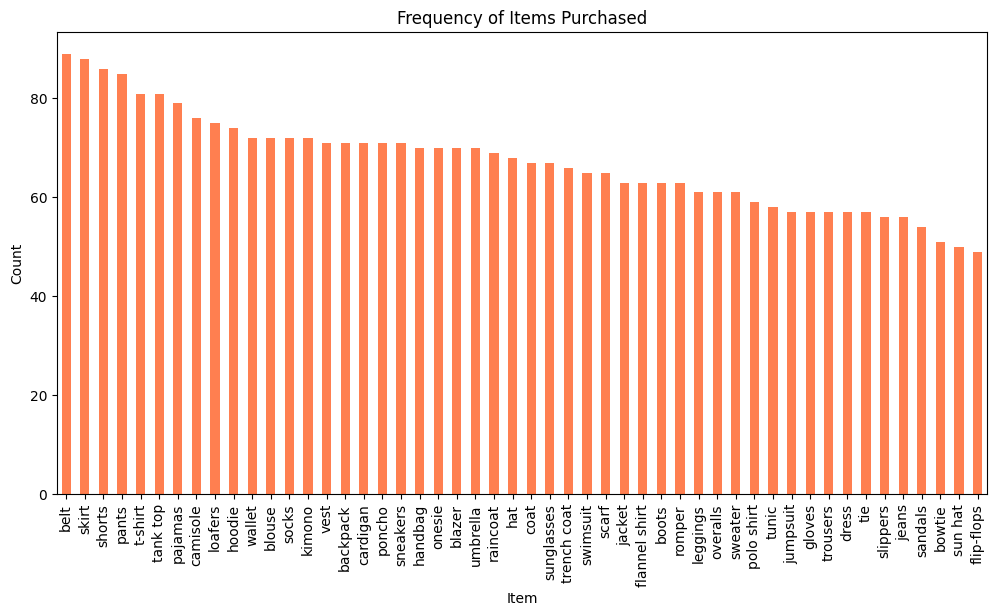

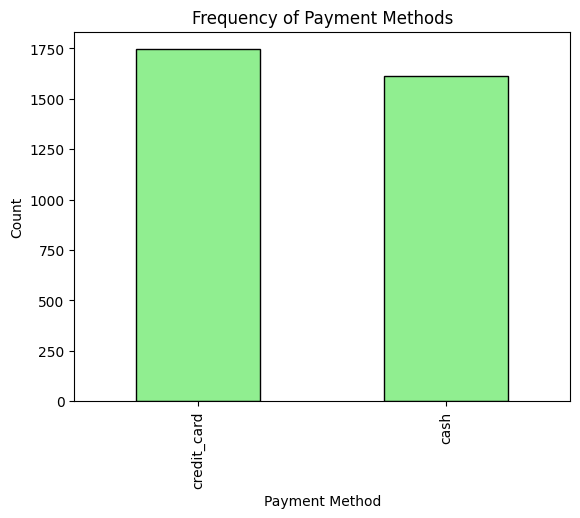

In [22]:
# Bar plot for 'Item Purchased'
item_counts = df['Item Purchased'].value_counts()
plt.figure(figsize=(12, 6))
item_counts.plot(kind='bar', color='coral')
plt.title('Frequency of Items Purchased')
plt.xlabel('Item')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Bar plot for 'Payment Method'
payment_counts = df['Payment Method'].value_counts()
payment_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Frequency of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()



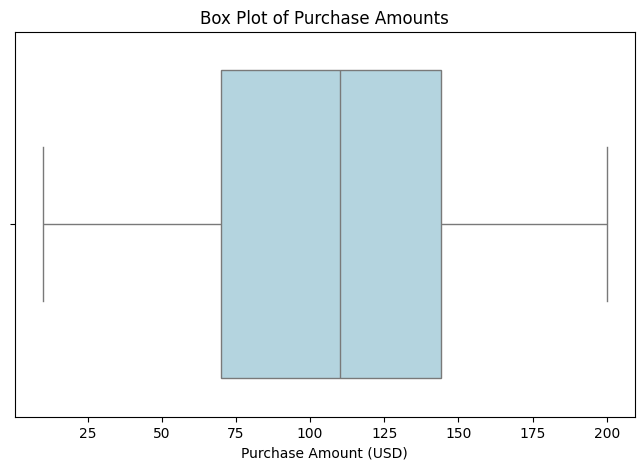

In [23]:
import seaborn as sns

# Box plot for Purchase Amount
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Purchase Amount (USD)'], color='lightblue')
plt.title('Box Plot of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.show()


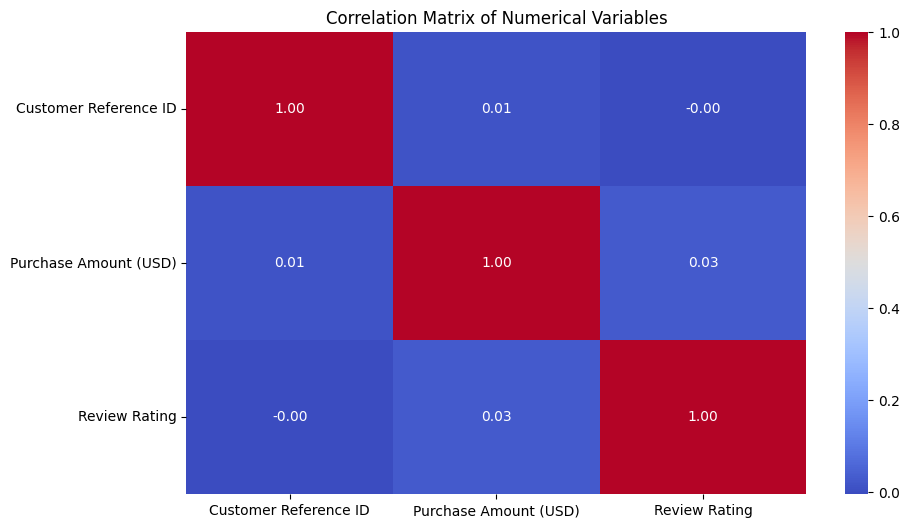

In [25]:
# Correlation matrix for numerical variables
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Generate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


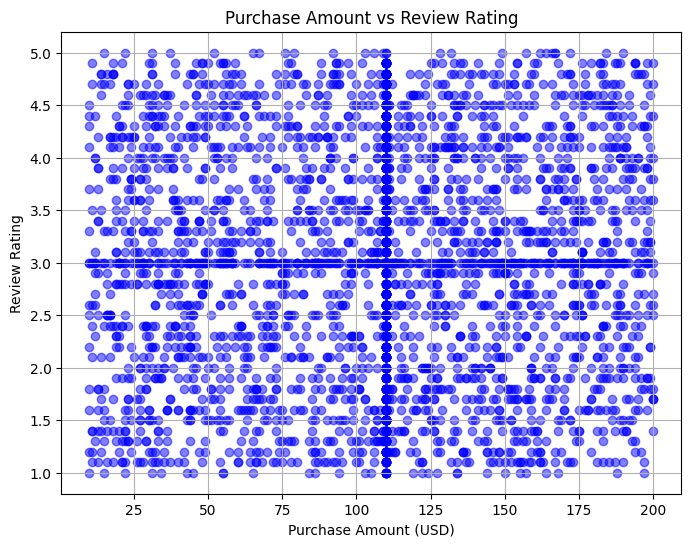

In [26]:
# Scatter plot to visualize the relationship between Purchase Amount and Review Rating
plt.figure(figsize=(8, 6))
plt.scatter(df['Purchase Amount (USD)'], df['Review Rating'], alpha=0.5, color='blue')
plt.title('Purchase Amount vs Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.grid(True)
plt.show()


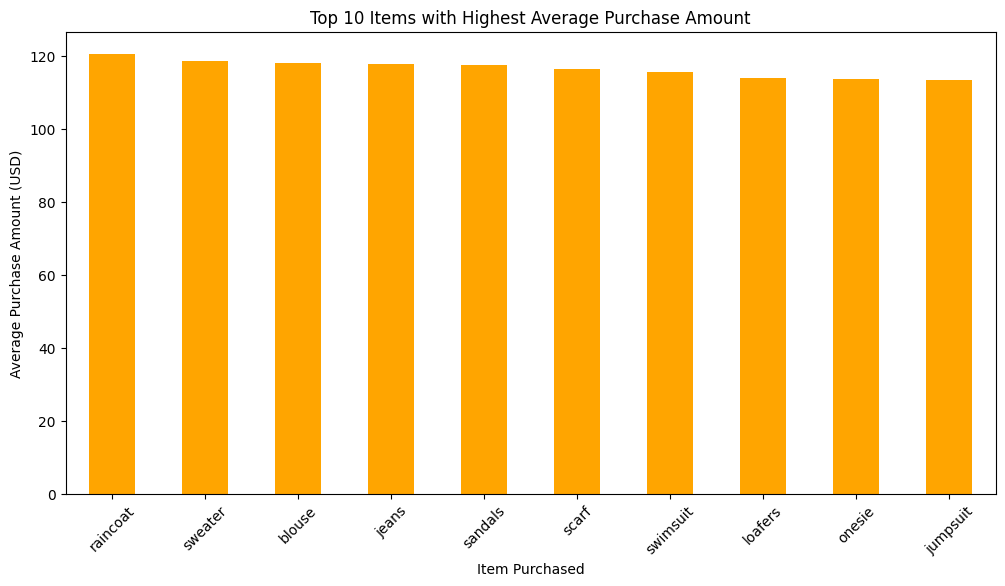

In [28]:
# Calculate average purchase amount by item purchased
avg_purchase_by_item = df.groupby('Item Purchased')['Purchase Amount (USD)'].mean().sort_values(ascending=False)

# Bar plot of average purchase amount by item purchased
avg_purchase_by_item[:10].plot(kind='bar', color='orange', figsize=(12, 6))
plt.title('Top 10 Items with Highest Average Purchase Amount')
plt.xlabel('Item Purchased')
plt.ylabel('Average Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-27-8c3a0a54933e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df, palette='pastel')


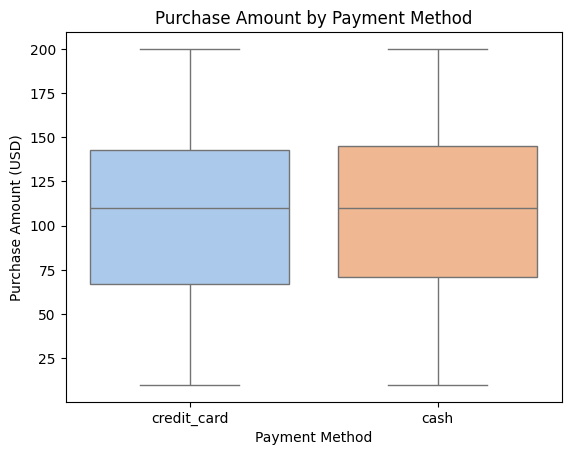

In [27]:
# Box plot to compare Purchase Amount by Payment Method
sns.boxplot(x='Payment Method', y='Purchase Amount (USD)', data=df, palette='pastel')
plt.title('Purchase Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Purchase Amount (USD)')
plt.show()



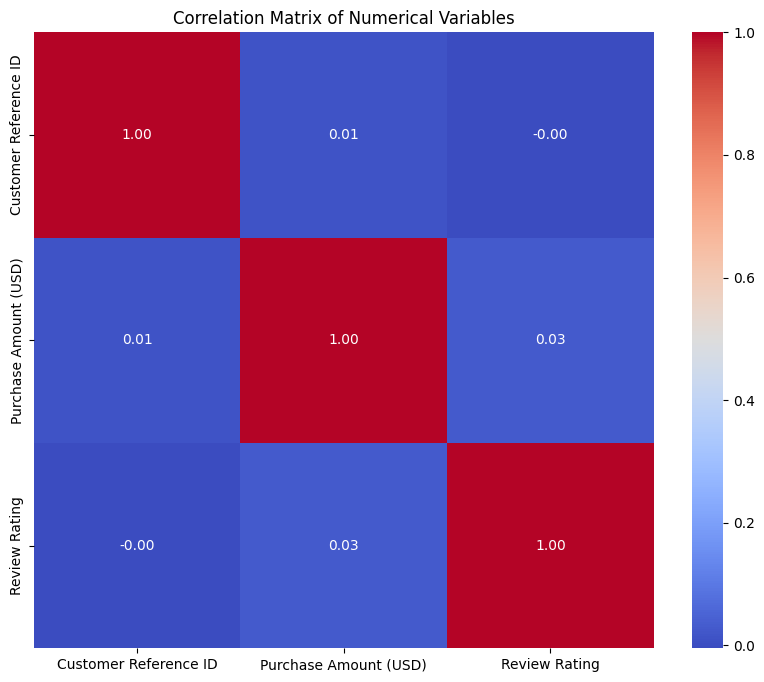

In [30]:
# Correlation matrix for numerical variables
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Generate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


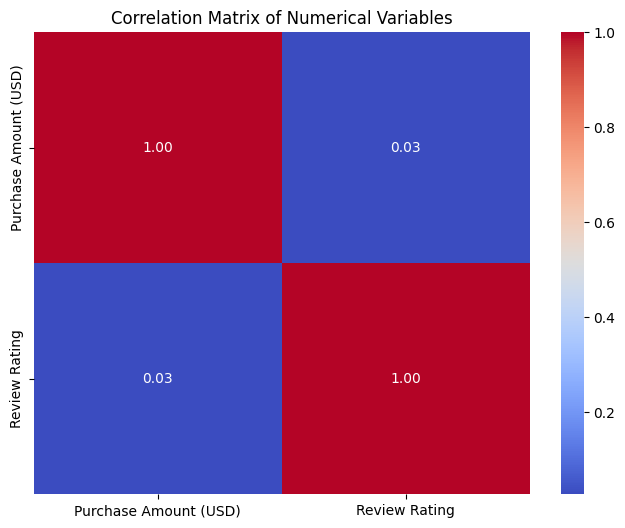

In [34]:
# Correlation matrix for numerical variables
numerical_df = df[['Purchase Amount (USD)', 'Review Rating']]  # Select only numerical columns

# Generate correlation matrix
correlation_matrix = numerical_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


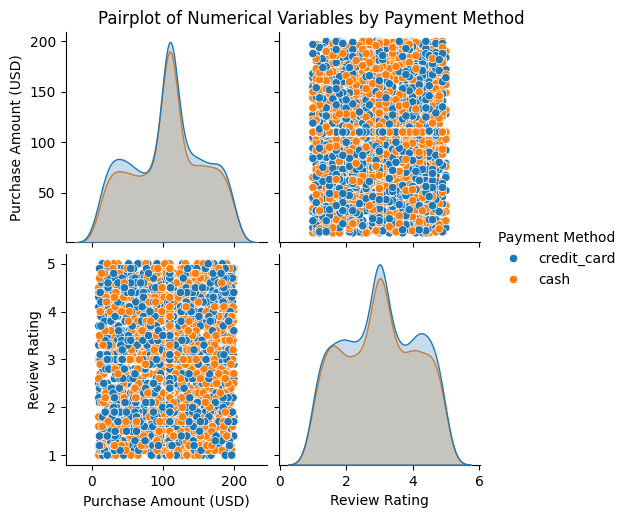

In [36]:
sns.pairplot(df, hue='Payment Method', vars=['Purchase Amount (USD)', 'Review Rating'])
plt.suptitle('Pairplot of Numerical Variables by Payment Method', y=1.02)
plt.show()


<ipython-input-37-24fec1d1a7e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Item Purchased', y='Review Rating', data=df, palette='pastel')


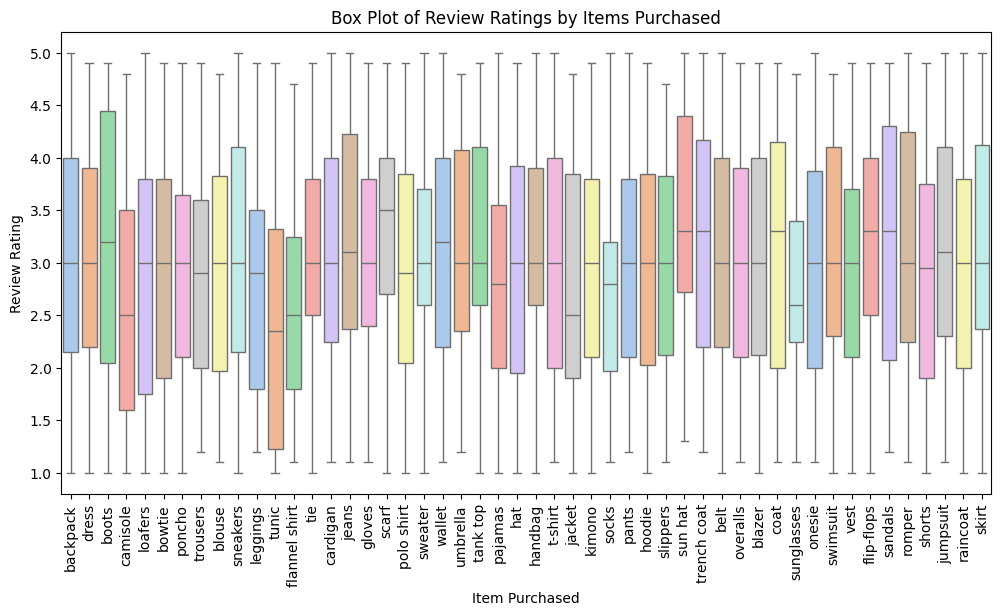

In [37]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Item Purchased', y='Review Rating', data=df, palette='pastel')
plt.title('Box Plot of Review Ratings by Items Purchased')
plt.xlabel('Item Purchased')
plt.ylabel('Review Rating')
plt.xticks(rotation=90)
plt.show()


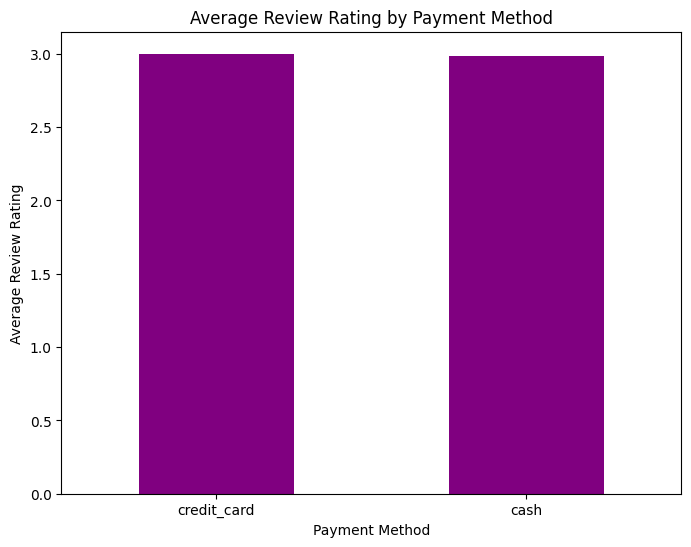

In [38]:
# Calculate average review rating by payment method
avg_rating_by_payment = df.groupby('Payment Method')['Review Rating'].mean().sort_values(ascending=False)

# Bar plot of average review rating by payment method
avg_rating_by_payment.plot(kind='bar', color='purple', figsize=(8, 6))
plt.title('Average Review Rating by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Average Review Rating')
plt.xticks(rotation=0)
plt.show()


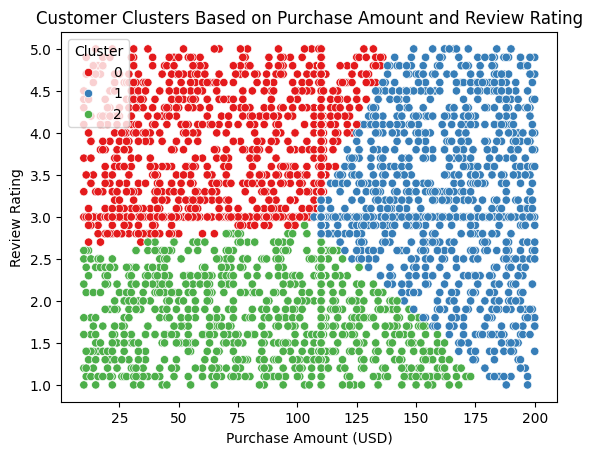

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select numerical columns for clustering
clustering_data = df[['Purchase Amount (USD)', 'Review Rating']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters using scatter plot
sns.scatterplot(x=df['Purchase Amount (USD)'], y=df['Review Rating'], hue=df['Cluster'], palette='Set1')
plt.title('Customer Clusters Based on Purchase Amount and Review Rating')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Review Rating')
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for regression
df_encoded = pd.get_dummies(df, columns=['Payment Method'], drop_first=True)  # One-hot encode categorical variables
X = df_encoded[['Review Rating', 'Payment Method_credit_card']]  # Independent variables
y = df_encoded['Purchase Amount (USD)']  # Dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Mean Squared Error: 2448.6861587209296
R-squared: -0.0057132345743100554


In [42]:
# Save cleaned dataset
df.to_csv('Cleaned_Fashion_Retail_Sales.csv', index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


Year  Month
2022  10       30857.0
      11       25224.0
      12       32385.0
2023  1        30668.0
      2        26002.0
      3        30907.0
      4        30816.0
      5        31809.0
      6        30118.0
      7        31524.0
      8        31743.0
      9        26824.0
      10         423.0
Name: Purchase Amount (USD), dtype: float64


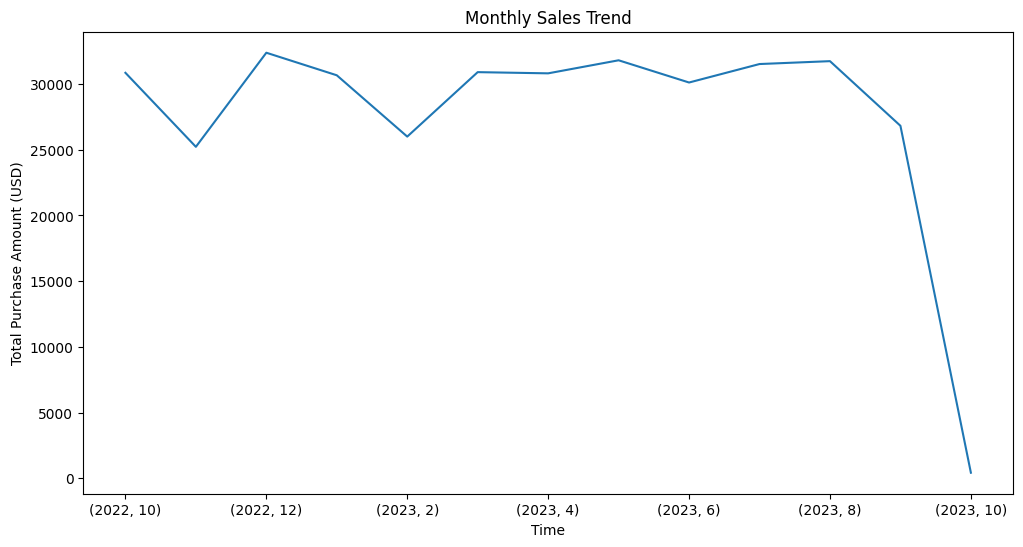

In [43]:
# Convert 'Date Purchase' to datetime format
df['Date Purchase'] = pd.to_datetime(df['Date Purchase'])

# Extract month and year
df['Month'] = df['Date Purchase'].dt.month
df['Year'] = df['Date Purchase'].dt.year

# Group by month/year and calculate total purchases
monthly_sales = df.groupby(['Year', 'Month'])['Purchase Amount (USD)'].sum()
print(monthly_sales)

# Plot monthly sales trend
monthly_sales.plot(kind='line', figsize=(12, 6), title='Monthly Sales Trend')
plt.xlabel('Time')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()
